<a href="https://colab.research.google.com/github/dr-mushtaq/Research-Work/blob/main/RTA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Table of Content**</p>

*   Importing and installing libraries⭐️
*   Installing Pycaret and other libraries⭐️
*   Import libraries⭐️
*   Particle Swarm Optimization⭐️

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Importing and Installing Librarie**</p>

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Installing Pycaret and other libraries**</p>

In [ ]:
# install the full version
!python -m pip install --upgrade pip setuptools wheel
!pip install pycaret

!pip install pyyaml==5.4.1

!pip install markupsafe==2.0.1

!pip install Jinja2

!pip install mlflow

!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... done
  Created wheel for markupsafe: filename=MarkupSafe-2.0.1-cp311-cp311-linux_x86_64.whl size=27995 sha256=0844708c6c5012e0d6e3f556d1444ce976826759609a89e78a84faa4d0c191b2
  Stored in directory: /root/.cache/pip/wheels/ea/18/79/6266ea508b8164a77b95aa19534c77eb805f2878612c37efca
Successfully built markupsafe
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Unin

Restart Runtime


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Import Libraries**</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
import jinja2
#from pycaret.regression import*
from pycaret.classification import*

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Importing Dataset**</p>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Virtual University /Thesis /Shujaat/Research Paper/KSILatest.csv')


Mounted at /content/drive


In [3]:
data.head()

,YEAR,Month,Date,TIME,Nature of weekday,Day,ROAD_CLASS,DISTRICT,LOCCOORD,ACCLOC,...,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
0,2006,3,11,852,Weekend,Saturday,Major Arterial,Toronto and East York,Intersection,At Intersection,...,No,No,No,No,No,No,Yes,No,No,No
1,2006,3,11,852,Weekend,Saturday,Major Arterial,Toronto and East York,Intersection,At Intersection,...,No,No,No,No,No,No,Yes,No,No,No
2,2006,3,11,915,Weekend,Saturday,Major Arterial,Scarborough,Intersection,At Intersection,...,Yes,No,No,No,No,No,Yes,Yes,No,No
3,2006,1,1,236,Weekend,Sunday,Major Arterial,Toronto and East York,Intersection,Intersection Related,...,No,No,No,No,Yes,Yes,Yes,No,Yes,No
4,2006,3,11,915,Weekend,Saturday,Major Arterial,Scarborough,Intersection,At Intersection,...,Yes,No,No,No,No,No,Yes,Yes,No,No


In [ ]:
data.info()

In [6]:
data2 = data.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = data.drop(data2.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data2.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (15749, 43)
Unseen Data For Predictions: (829, 43)


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Data Exploration**</p>

In [7]:
plt.figure(figsize=(20, 8))
plt.title("Top District with the highest number of accidents")
state_counts = data["DISTRICT"].value_counts()
# Pass x and y as named arguments
sns.barplot(x=state_counts[:3].values, y=state_counts[:3].index, orient="h")
plt.xlabel("Number of accident")
plt.ylabel("DISTRICT")
plt.show()

NameError: name 'plt' is not defined

**Number of accidents for weekday**

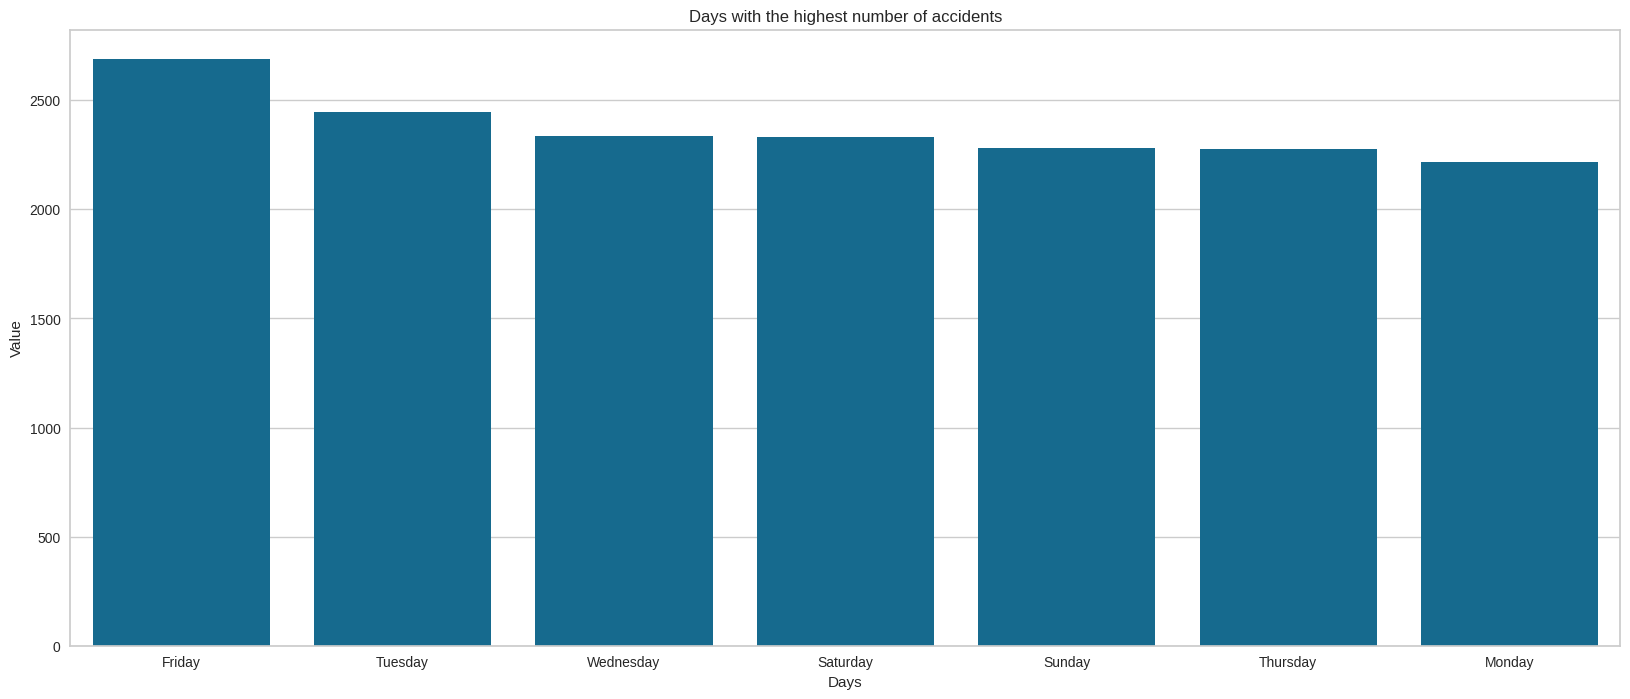

In [ ]:
counts = data["Day"].value_counts()[:15]
plt.figure(figsize=(20, 8))
plt.title("Number of accidents for weekday")
# Pass x and y as named arguments
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Days")
plt.ylabel("Value")
plt.show()

**Correlation**

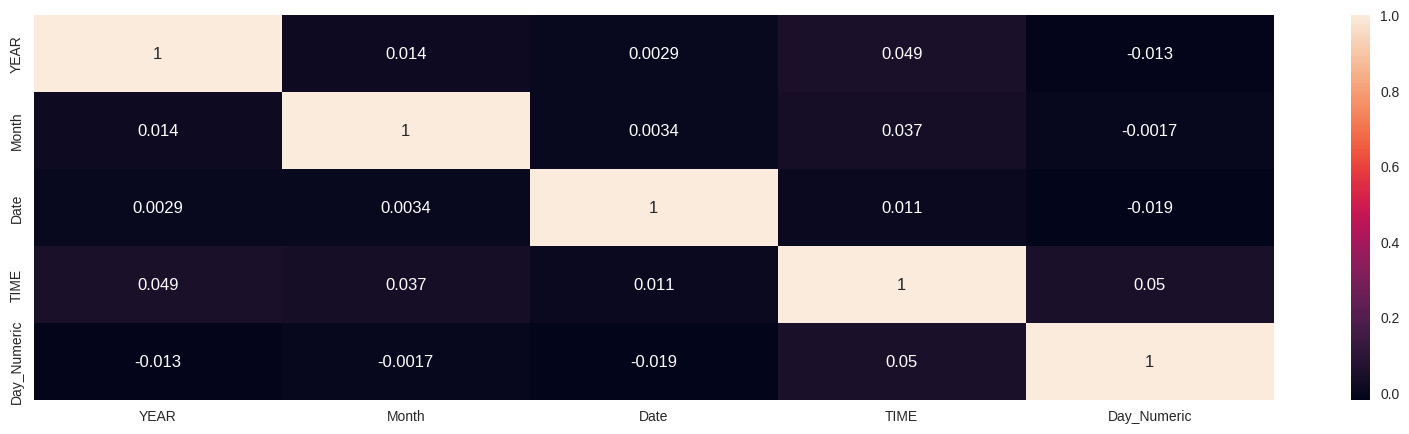

In [ ]:
# Convert 'Day' column to numerical representation before calculating correlation
data['Day_Numeric'] = pd.factorize(data['Day'])[0]

# Now calculate correlation and plot the heatmap using the new numerical column
plt.figure(figsize=(20, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True)  # Specify numeric_only=True for pandas >= 2.0
plt.show()


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Setting up Environment in PyCaret**</p>

In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data, target = 'injury_type', fix_imbalance = True, session_id=123)

,Description,Value
0,Session id,123
1,Target,injury_type
2,Target type,Multiclass
3,Target mapping,"Fatal: 0, Major: 1, Minimal: 2, Minor: 3, No injury: 4"
4,Original data shape,"(16578, 43)"
5,Transformed data shape,"(29309, 270)"
6,Transformed train set shape,"(24335, 270)"
7,Transformed test set shape,"(4974, 270)"
8,Numeric features,4
9,Categorical features,38


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Classification**</p>

##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Compairing All Models**</p>

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7578,0.9244,0.7578,0.7332,0.7419,0.6301,0.6319,57.0780
xgboost,Extreme Gradient Boosting,0.7554,0.9229,0.7554,0.7316,0.7400,0.6263,0.6281,22.4640
rf,Random Forest Classifier,0.7492,0.9116,0.7492,0.7211,0.7282,0.6132,0.6171,9.2920
et,Extra Trees Classifier,0.7468,0.9015,0.7468,0.7231,0.7313,0.6136,0.6155,10.6410
gbc,Gradient Boosting Classifier,0.7397,0.0000,0.7397,0.7396,0.7388,0.6135,0.6139,97.7730
dt,Decision Tree Classifier,0.6855,0.7819,0.6855,0.6945,0.6895,0.5345,0.5348,3.2570
ridge,Ridge Classifier,0.6817,0.0000,0.6817,0.7797,0.7166,0.5591,0.5689,2.2760
lda,Linear Discriminant Analysis,0.6675,0.0000,0.6675,0.7986,0.7122,0.5470,0.5620,2.9550
lr,Logistic Regression,0.6020,0.0000,0.6020,0.7180,0.6407,0.4578,0.4697,28.9750
nb,Naive Bayes,0.4993,0.8325,0.4993,0.7374,0.5669,0.3491,0.3805,2.1120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Selecting Best Model**</p>

In [ ]:
best= compare_models(n_select = 9, sort= 'Accuracy')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:36:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7492,0.9116,0.7492,0.7211,0.7282,0.6132,0.6171,8.8060
dt,Decision Tree Classifier,0.6855,0.7819,0.6855,0.6945,0.6895,0.5345,0.5348,3.1010
ridge,Ridge Classifier,0.6817,0.0000,0.6817,0.7797,0.7166,0.5591,0.5689,2.1990
lr,Logistic Regression,0.6020,0.0000,0.6020,0.7180,0.6407,0.4578,0.4697,28.5470
nb,Naive Bayes,0.4993,0.8325,0.4993,0.7374,0.5669,0.3491,0.3805,2.1260
ada,Ada Boost Classifier,0.4705,0.0000,0.4705,0.6026,0.5147,0.2908,0.3058,6.1970
knn,K Neighbors Classifier,0.2312,0.5103,0.2312,0.3356,0.2458,0.0356,0.0389,2.9720
svm,SVM - Linear Kernel,0.1872,0.0000,0.1872,0.3037,0.1442,0.0623,0.0834,22.9810
qda,Quadratic Discriminant Analysis,0.1861,0.0000,0.1861,0.7359,0.1934,0.0773,0.1441,2.7320


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7578,0.9244,0.7578,0.7332,0.7419,0.6301,0.6319,60.4480
xgboost,Extreme Gradient Boosting,0.7554,0.9229,0.7554,0.7316,0.7400,0.6263,0.6281,22.0710
rf,Random Forest Classifier,0.7492,0.9116,0.7492,0.7211,0.7282,0.6132,0.6171,8.8060
et,Extra Trees Classifier,0.7468,0.9015,0.7468,0.7231,0.7313,0.6136,0.6155,10.9780
gbc,Gradient Boosting Classifier,0.7397,0.0000,0.7397,0.7396,0.7388,0.6135,0.6139,96.7110
dt,Decision Tree Classifier,0.6855,0.7819,0.6855,0.6945,0.6895,0.5345,0.5348,3.1010
ridge,Ridge Classifier,0.6817,0.0000,0.6817,0.7797,0.7166,0.5591,0.5689,2.1990
lda,Linear Discriminant Analysis,0.6675,0.0000,0.6675,0.7986,0.7122,0.5470,0.5620,2.8970
lr,Logistic Regression,0.6020,0.0000,0.6020,0.7180,0.6407,0.4578,0.4697,28.5470
nb,Naive Bayes,0.4993,0.8325,0.4993,0.7374,0.5669,0.3491,0.3805,2.1260



##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Creating Best Models**</p>

In [ ]:
gbc = create_model('gbc')
rf = create_model('rf')
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7485,0.0000,0.7485,0.7457,0.7466,0.6262,0.6264
1,0.7459,0.0000,0.7459,0.7415,0.7429,0.6228,0.6230
2,0.7313,0.0000,0.7313,0.7387,0.7345,0.6030,0.6033
3,0.7425,0.0000,0.7425,0.7388,0.7397,0.6162,0.6167
4,0.7233,0.0000,0.7233,0.7248,0.7227,0.5900,0.5907
5,0.7276,0.0000,0.7276,0.7311,0.7278,0.5957,0.5966
6,0.7422,0.0000,0.7422,0.7433,0.7424,0.6159,0.6161
7,0.7509,0.0000,0.7509,0.7505,0.7503,0.6301,0.6303
8,0.7336,0.0000,0.7336,0.7275,0.7291,0.6029,0.6035


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7571,0.9199,0.7571,0.7311,0.7370,0.6269,0.6306
1,0.7666,0.9196,0.7666,0.7348,0.7430,0.6396,0.6445
2,0.7476,0.9022,0.7476,0.7177,0.7267,0.6099,0.6135
3,0.7442,0.9065,0.7442,0.7163,0.7236,0.6061,0.6096
4,0.7328,0.9067,0.7328,0.7087,0.7176,0.5922,0.5941
5,0.7431,0.9029,0.7431,0.7151,0.7221,0.6023,0.6068
6,0.7500,0.9083,0.7500,0.7254,0.7293,0.6141,0.6175
7,0.7534,0.9204,0.7534,0.7219,0.7319,0.6182,0.6222
8,0.7466,0.9151,0.7466,0.7227,0.7251,0.6083,0.6131


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7606,0.9121,0.7606,0.7380,0.7450,0.6351,0.6372
1,0.7545,0.9076,0.7545,0.7290,0.7374,0.6248,0.6270
2,0.7425,0.8949,0.7425,0.7175,0.7276,0.6073,0.6089
3,0.7330,0.8916,0.7330,0.7096,0.7177,0.5925,0.5944
4,0.7302,0.8950,0.7302,0.7135,0.7206,0.5932,0.5938
5,0.7500,0.8947,0.7500,0.7249,0.7336,0.6169,0.6194
6,0.7483,0.8967,0.7483,0.7266,0.7334,0.6149,0.6166
7,0.7543,0.9093,0.7543,0.7274,0.7369,0.6221,0.6245
8,0.7517,0.9101,0.7517,0.7318,0.7370,0.6223,0.6245


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Analyzing Models**</p>

In [ ]:
evaluate_model(gbc)
evaluate_model(rf)
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Association Rule Mining**</p>

##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Installing Apriori**</p>

In [1]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=055bf214fe2a574d73aade9fcb82e2e5a4430525d17ff3e665f17a9677d896e3
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Finding Associations**</p>

In [ ]:
from google.colab import drive
import pandas as pd
from apyori import apriori

# Mount Google Drive
drive.mount('/content/drive')

# Assuming your CSV file is named 'accident_data.csv'
file_path = '/content/drive/MyDrive/Virtual University /Thesis /Shujaat/Research Paper/RTA Data 2020 to July 2023.xlsx'


df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

# Convert the DataFrame to a list of lists
transactions = df.values.tolist()

# Set your desired parameters for the Apriori algorithm
min_support = 0.04  # Adjust as needed
min_confidence = 0.5  # Adjust as needed

# Convert all items in transactions to strings
transactions = [[str(item) for item in transaction] for transaction in transactions]

# Apply Apriori algorithm
rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence)

# Convert the rules to a list for easier handling
rules_list = list(rules)

# Display the discovered association rules
for rule in rules_list:
    print(rule)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 17: invalid start byte

##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Converting rules into table**</p>

In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate

# Assuming you have already run the Apriori algorithm and obtained the rules_list

# Define a function to convert the output to a table format
def display_rules(rules_list):
    table_headers = ["Antecedent", "Consequent", "Support", "Confidence", "Lift"]

    # Initialize an empty list to store rows of the table
    table_rows = []

    for rule in rules_list:
        antecedent = ', '.join(rule[0]) if rule[0] else 'None'  # Extract antecedent

        # Extract consequent information from ordered statistics
        consequent_info = rule[2][0]
        consequent = ', '.join(consequent_info.items_add) if consequent_info.items_add else 'None'

        support = rule[1]
        confidence = consequent_info.confidence
        lift = consequent_info.lift

        # Append the current rule to the table_rows
        table_rows.append([antecedent, consequent, support, confidence, lift])

    # Display the table using the tabulate library
    print(tabulate(table_rows, headers=table_headers, floatfmt=".4f"))

# Display the rules in a table format
display_rules(rules_list)



##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Downloading Rules into Excel file**</p>

In [ ]:
#excel file
import pandas as pd
from tabulate import tabulate

# Assuming you have already run the Apriori algorithm and obtained the rules_list

# Define a function to convert the output to a table format
def display_rules(rules_list):
    table_headers = ["Antecedent", "Consequent", "Support", "Confidence", "Lift"]

    # Initialize an empty list to store rows of the table
    table_rows = []

    for rule in rules_list:
        antecedent = ', '.join(rule[0]) if rule[0] else 'None'  # Extract antecedent

        # Extract consequent information from ordered statistics
        consequent_info = rule[2][0]
        consequent = ', '.join(consequent_info.items_add) if consequent_info.items_add else 'None'

        support = rule[1]
        confidence = consequent_info.confidence
        lift = consequent_info.lift

        # Append the current rule to the table_rows
        table_rows.append([antecedent, consequent, support, confidence, lift])

    # Convert the table data to a DataFrame
    df = pd.DataFrame(table_rows, columns=table_headers)

    # Save the DataFrame to an Excel file
    excel_file_path = '/content/drive/MyDrive/Dataset/Association Rule 13I.xlsx'
    df.to_excel(excel_file_path, index=False)
    print(f"Association rules saved to {excel_file_path}")

# Display the rules in a table format
display_rules(rules_list)


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Applied Latest ML Methods**</p>

Random Forest Accuracy: 0.7449
SVM Accuracy: 0.6815
XGBoost Accuracy: 0.7497
Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.4118 - loss: 1.3168 - val_accuracy: 0.4489 - val_loss: 1.2231
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4562 - loss: 1.2071 - val_accuracy: 0.4616 - val_loss: 1.1402
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4660 - loss: 1.1007 - val_accuracy: 0.4948 - val_loss: 1.0778
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5028 - loss: 1.0716 - val_accuracy: 0.5086 - val_loss: 1.0697
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4971 - loss: 1.0723 - val_accuracy: 0.4954 - val_loss: 1.0733
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5182 - loss: 1.0458 - val_accuracy: 0.5267 - val_loss: 1.0288
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5410 - loss: 1.0133 - val_accuracy: 0.5495 - val_loss: 1.0074
Epoch 8/20
363/363 ━

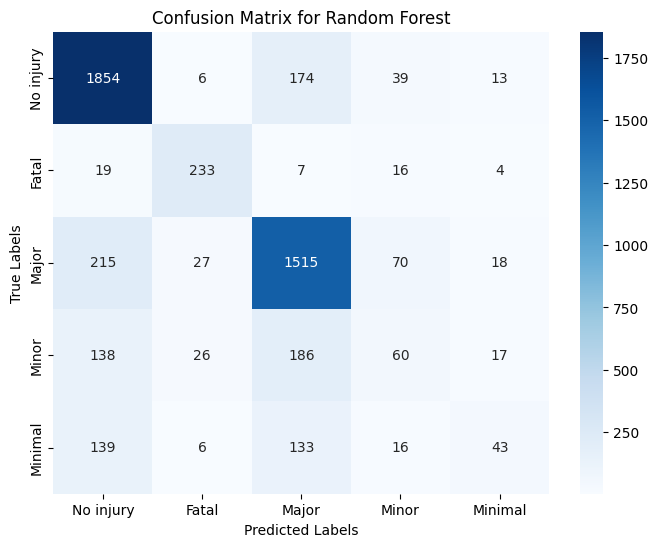

Classification Report
              precision    recall  f1-score   support

   No injury       0.78      0.89      0.83      2086
       Fatal       0.78      0.84      0.81       279
       Major       0.75      0.82      0.78      1845
       Minor       0.30      0.14      0.19       427
     Minimal       0.45      0.13      0.20       337

    accuracy                           0.74      4974
   macro avg       0.61      0.56      0.56      4974
weighted avg       0.71      0.74      0.72      4974


### Confusion Matrix and Classification Report for SVM ###


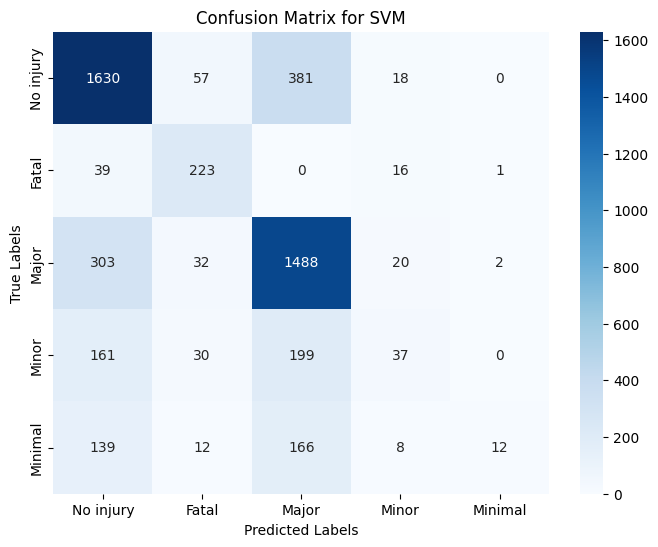

Classification Report
              precision    recall  f1-score   support

   No injury       0.72      0.78      0.75      2086
       Fatal       0.63      0.80      0.70       279
       Major       0.67      0.81      0.73      1845
       Minor       0.37      0.09      0.14       427
     Minimal       0.80      0.04      0.07       337

    accuracy                           0.68      4974
   macro avg       0.64      0.50      0.48      4974
weighted avg       0.67      0.68      0.64      4974


### Confusion Matrix and Classification Report for XGBoost ###


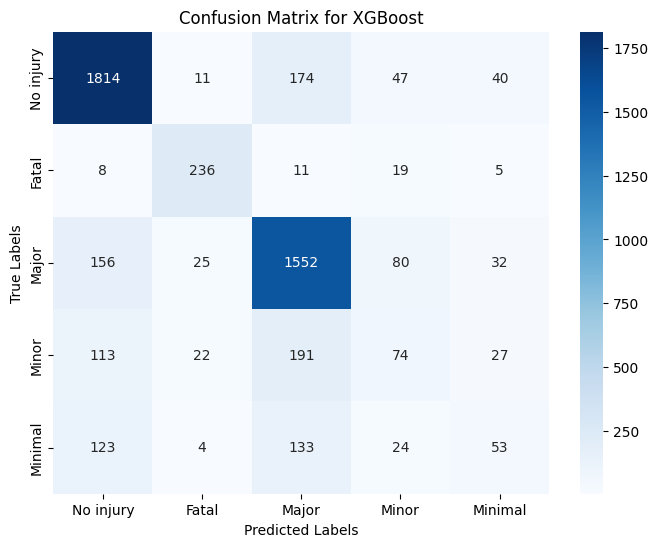

Classification Report
              precision    recall  f1-score   support

   No injury       0.82      0.87      0.84      2086
       Fatal       0.79      0.85      0.82       279
       Major       0.75      0.84      0.79      1845
       Minor       0.30      0.17      0.22       427
     Minimal       0.34      0.16      0.21       337

    accuracy                           0.75      4974
   macro avg       0.60      0.58      0.58      4974
weighted avg       0.72      0.75      0.73      4974


### Confusion Matrix and Classification Report for BiLSTM ###


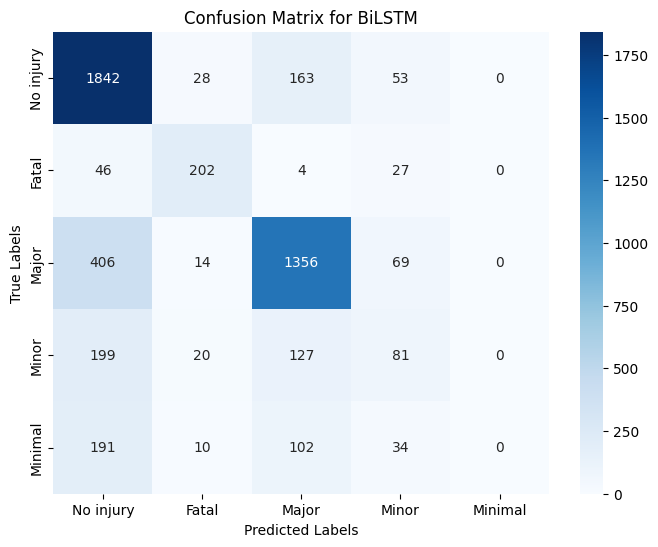

Classification Report
              precision    recall  f1-score   support

   No injury       0.69      0.88      0.77      2086
       Fatal       0.74      0.72      0.73       279
       Major       0.77      0.73      0.75      1845
       Minor       0.31      0.19      0.23       427
     Minimal       0.00      0.00      0.00       337

    accuracy                           0.70      4974
   macro avg       0.50      0.51      0.50      4974
weighted avg       0.64      0.70      0.66      4974


### Confusion Matrix and Classification Report for ATTR-LSTM ###


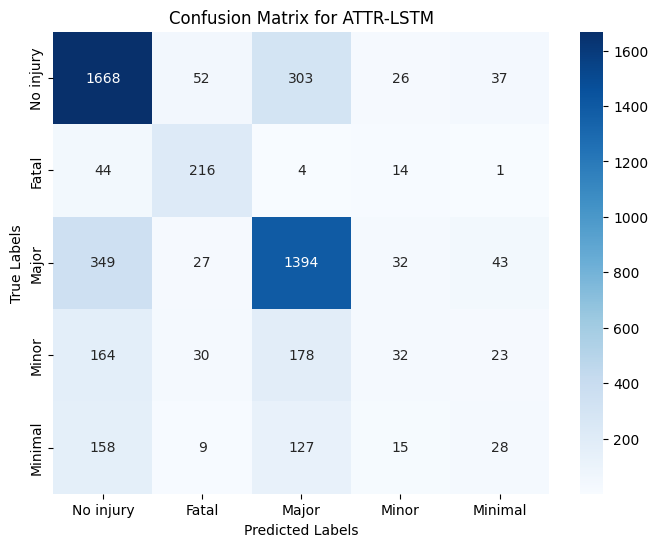

Classification Report
              precision    recall  f1-score   support

   No injury       0.70      0.80      0.75      2086
       Fatal       0.65      0.77      0.70       279
       Major       0.69      0.76      0.72      1845
       Minor       0.27      0.07      0.12       427
     Minimal       0.21      0.08      0.12       337

    accuracy                           0.67      4974
   macro avg       0.50      0.50      0.48      4974
weighted avg       0.63      0.67      0.64      4974


### Confusion Matrix and Classification Report for KNN-LSTM ###


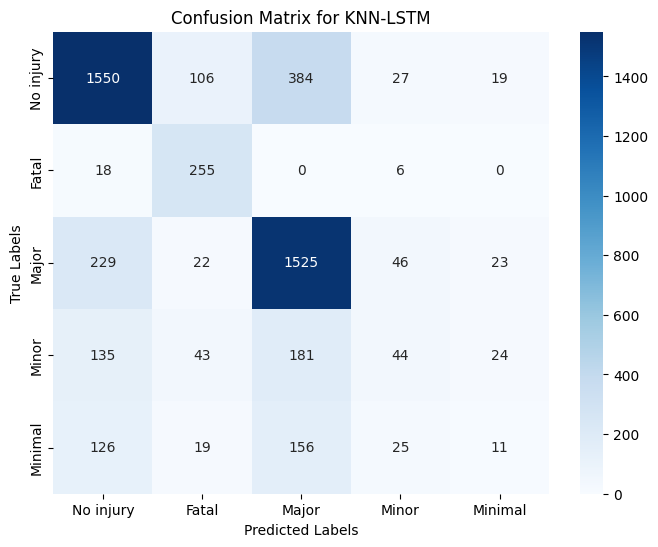

Classification Report
              precision    recall  f1-score   support

   No injury       0.75      0.74      0.75      2086
       Fatal       0.57      0.91      0.70       279
       Major       0.68      0.83      0.75      1845
       Minor       0.30      0.10      0.15       427
     Minimal       0.14      0.03      0.05       337

    accuracy                           0.68      4974
   macro avg       0.49      0.52      0.48      4974
weighted avg       0.64      0.68      0.65      4974


### Confusion Matrix and Classification Report for W-CNN-LSTM ###


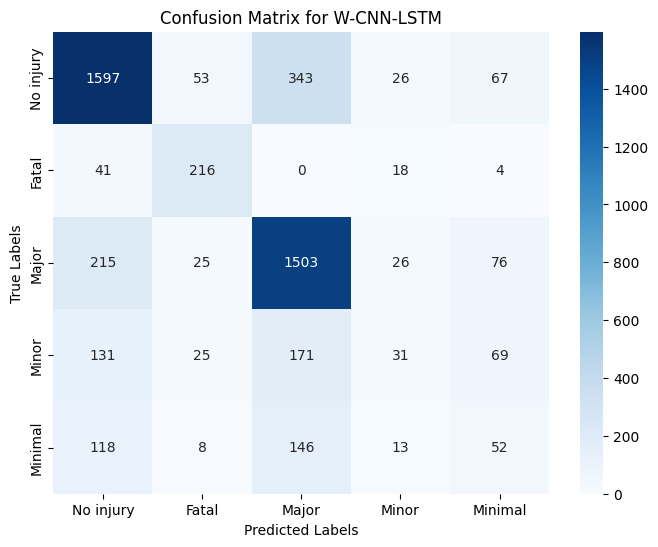

Classification Report
              precision    recall  f1-score   support

   No injury       0.76      0.77      0.76      2086
       Fatal       0.66      0.77      0.71       279
       Major       0.69      0.81      0.75      1845
       Minor       0.27      0.07      0.11       427
     Minimal       0.19      0.15      0.17       337

    accuracy                           0.68      4974
   macro avg       0.52      0.52      0.50      4974
weighted avg       0.65      0.68      0.66      4974



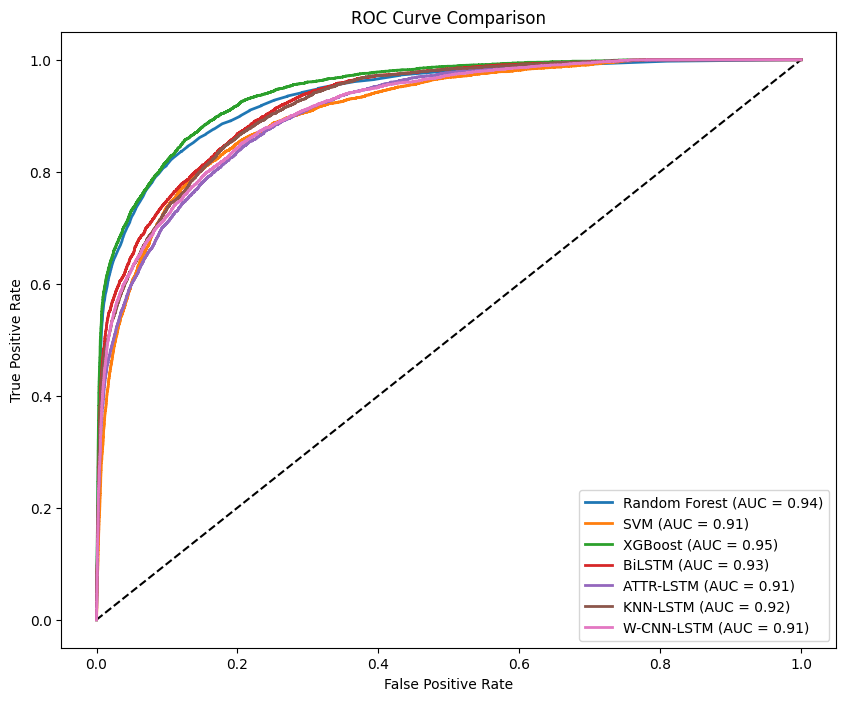

In [22]:
!pip install tensorflow tabulate scikit-learn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Attention, Conv1D, MaxPooling1D, Flatten, Input, Concatenate
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Virtual University /Thesis /Shujaat/Research Paper/KSILatest.csv')

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Encode categorical labels
data['injury_type'].replace({'No injury': 0, 'Fatal': 1, 'Major': 2, 'Minor': 3, 'Minimal': 4}, inplace=True)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Prepare features and labels
X = data.drop('injury_type', axis=1)
y = data['injury_type']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.expand_dims(X, axis=2)  # Reshape for LSTM models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=100)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Traditional ML Models
ml_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

ml_results = {}
ml_predictions={} # Store predictions for confusion matrix
ml_prob = {} # store probability estimates for ROC curve
for name, model in ml_models.items():
    model.fit(X_train.squeeze(), y_train)  # Remove extra dimension for ML models
    y_pred = model.predict(X_test.squeeze())
    ml_predictions[name] = y_pred # save the predictions
    ml_results[name] = accuracy_score(y_test, y_pred)
    ml_prob[name] = model.predict_proba(X_test.squeeze())
    print(f"{name} Accuracy: {ml_results[name]:.4f}")

# Define LSTM-Based Models
def build_bilstm():
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])), # Changed to return_sequences=False
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(5, activation='softmax')
    ])
    return model

def build_attr_lstm():
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
    lstm_out = LSTM(128, return_sequences=True)(inputs)
    attention = Attention()([lstm_out, lstm_out])
    flatten = Flatten()(attention) # added flatten layer
    outputs = Dense(5, activation='softmax')(flatten)
    model = Model(inputs, outputs)
    return model

def build_knn_lstm():
    model = Sequential([
        LSTM(128, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),# Changed to return_sequences=False
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(5, activation='softmax')
    ])
    return model

def build_wcnn_lstm():
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
    conv = Conv1D(64, kernel_size=3, activation='relu')(inputs)
    maxpool = MaxPooling1D(pool_size=2)(conv)
    flatten = Flatten()(maxpool) # added flatten layer
    outputs = Dense(5, activation='softmax')(flatten)
    model = Model(inputs, outputs)
    return model

# Train Deep Learning Models
dl_models = {
    "BiLSTM": build_bilstm(),
    "ATTR-LSTM": build_attr_lstm(),
    "KNN-LSTM": build_knn_lstm(),
    "W-CNN-LSTM": build_wcnn_lstm()
}

dl_results = {}
dl_predictions={} # store predictions for confusion matrix and classification report
dl_prob = {} # store probability estimates for ROC curve
for name, model in dl_models.items():
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    _, acc = model.evaluate(X_test, y_test)
    dl_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    dl_predictions[name]=model.predict(X_test)
    dl_prob[name] = model.predict(X_test)

# Compare Results
# Combine all results into a single dictionary
all_results = {**ml_results, **dl_results}

# Prepare data for the table
table_data = []
for model_name, accuracy in all_results.items():
    table_data.append([model_name, f"{accuracy:.4f}"])  # Format accuracy to 4 decimal places

# Define table headers
table_headers = ["Model", "Accuracy"]

# Print the table
print("\n### Model Accuracy Comparison ###")
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))

# Confusion Matrix and Classification Report for each model
class_names = ['No injury', 'Fatal', 'Major', 'Minor', 'Minimal']
all_predictions = {**ml_predictions, **dl_predictions}

for name, predictions in all_predictions.items():
  print(f"\n### Confusion Matrix and Classification Report for {name} ###")
  if name in ml_models: # it is a traditional model, convert the output to same format as DL models
    y_pred_classes = predictions # no conversion is required
  else:
    y_pred_classes = np.argmax(predictions, axis=1) # get the class with highest probability

  cm = confusion_matrix(y_test, y_pred_classes)

  # Display confusion matrix using seaborn heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.title("Confusion Matrix for " + name)
  plt.show()

  # Create Classification Report Table
  print("Classification Report")
  print(classification_report(y_test, y_pred_classes, target_names=class_names))

# ROC Curve Comparison Plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing

# Iterate through all models' probabilities to plot ROC curves
all_prob = {**ml_prob, **dl_prob}
for name, prob in all_prob.items():
    if name in ml_models:
        # For traditional ML models (sklearn), we have predict_proba, so we use that.
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), prob.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        plt.plot(fpr["micro"], tpr["micro"], label=f'{name} (AUC = {roc_auc["micro"]:.2f})', linewidth=2)
    else:
        # For DL models (tensorflow/keras), we get the probabilities directly.
        prob = prob.reshape(-1,5)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), prob.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        plt.plot(fpr["micro"], tpr["micro"], label=f'{name} (AUC = {roc_auc["micro"]:.2f})', linewidth=2)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**References**</p>

[1-Road-Accident-Severity-Prediction(Projects)](https://github.com/JohnRaghul/Road-Accident-Severity-Prediction/blob/main/Road-Accident-Severity-Prediction.ipynb)

